# Customer Segmentation Project  

## Objective  
Cluster mall customers into distinct groups based on **annual income** and **spending score** to identify customer segments.  

## Dataset  
- **Source**: Mall Customer Dataset (Kaggle)  
- **Problem Type**: Clustering (Unsupervised Learning)  
- **Focus**: Finding optimal number of clusters and analyzing spending patterns  

## Tools & Libraries   
- **Pandas**: Data manipulation  
- **Scikit-learn**: Scaling, K-Means  
- **Matplotlib**: Visualization  

In [3]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Datasets/Mall_Customers.csv")

In [6]:
print("Drop missing values..")
df.dropna(inplace=True)
print("Generate descriptive statistics: ")
df.describe()

Drop missing values..
Generate descriptive statistics: 


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 3. Feature Selection and Scaling  
- Select features: **Annual Income (k$)** and **Spending Score (1-100)**  
- Standardize features using **StandardScaler**  

In [7]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
df[['Annual Income_S', 'Spending Score_S']] = scaler.fit_transform(features)

### 4. Elbow Method for Optimal Clusters  
- Train K-Means for `k = 1 … 8`  
- Collect inertia values  
- Plot inertia vs. number of clusters to identify optimal k 

<class 'function'>


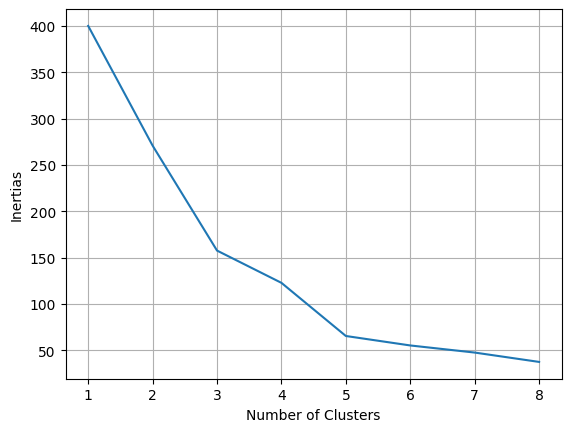

In [8]:
inertias = []
print(type(plt.xlabel))

for i in range(1, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income_S', 'Spending Score_S']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 9), inertias)
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias")
plt.show()

### 5. Apply K-Means (k=5)  
- Train K-Means with `k=5`  
- Assign cluster labels to each customer in the dataset  

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['Annual Income_S', 'Spending Score_S']])
df["KMeans_5"] = kmeans.labels_
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income_S,Spending Score_S,KMeans_5
0,1,Male,19,15,39,-1.738999,-0.434801,4
1,2,Male,21,15,81,-1.738999,1.195704,3
2,3,Female,20,16,6,-1.700830,-1.715913,4
3,4,Female,23,16,77,-1.700830,1.040418,3
4,5,Female,31,17,40,-1.662660,-0.395980,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061,2
196,197,Female,45,126,28,2.497807,-0.861839,1
197,198,Male,32,126,74,2.497807,0.923953,2
198,199,Male,32,137,18,2.917671,-1.250054,1


### 6. Cluster Analysis  
- Compute mean **Annual Income** and **Spending Score** per cluster  
- Define function `categorize_cluster()` to label clusters as:  
  - **High Value**: High income, high spending  
  - **Conservative**: High income, low spending  
  - **Aspirational**: Low income, high spending  
  - **Constrained**: Low income, low spending  
  - **Balanced**: Moderate income and spending  

In [12]:
average= df.groupby("KMeans_5")[['Spending Score (1-100)', 'Annual Income (k$)']].mean()
def categorize_cluster(income, spending):
    if income > 60 and spending > 60:
        return "High Value"
    elif income > 60 and spending < 40:
        return "Conservative" 
    elif income < 40 and spending > 60:
        return "Aspirational"
    elif income < 40 and spending < 40:
        return "Constrained"
    else:
        return "Balanced"

average['Category'] = average.apply(lambda row: categorize_cluster(
    row['Annual Income (k$)'], 
    row['Spending Score (1-100)']), axis=1)

clusters_labels = average['Category']
colors = ['red', 'blue', 'green', 'orange', 'purple']

### 7. Visualization  
- Plot a 2D scatter plot of **Spending Score vs. Annual Income**  
- Color each cluster differently  
- Add legend with descriptive category labels  

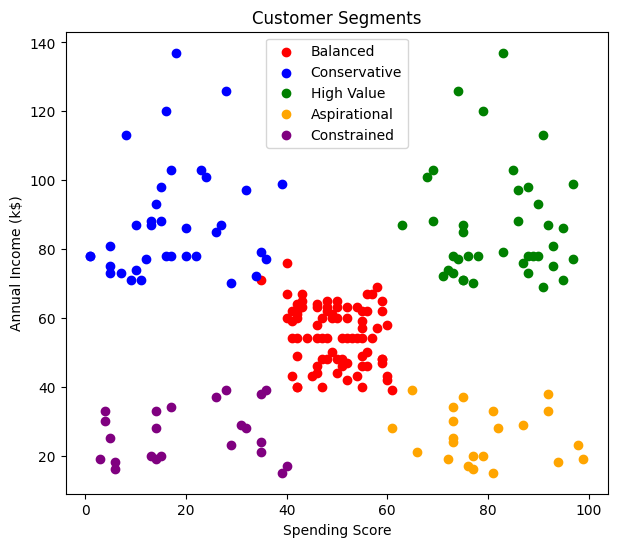

In [13]:
plt.figure(figsize=(7, 6))
for i in range(5):
    data = df[df['KMeans_5']==i]
    plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'], c=colors[i], label=clusters_labels[i])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segments')
plt.legend()
plt.show()